In [5]:
import json
import pandas as pd
from pymongo import MongoClient

In [6]:
client = MongoClient('localhost', 27017)
db = client.steamspy

In [8]:
data = pd.DataFrame(list(db.clean.find()))

In [13]:
data.drop(columns = "_id", inplace = True) #drop _id column

In [14]:
singleplayer = data[data['Tags'].apply(lambda x: 'Singleplayer' in x)] #new dataframe with only singleplayer games

In [17]:
gamefeatures= pd.read_csv("gamefeatures.csv")

In [21]:
gamefeatures = gamefeatures.rename(columns = {'QueryID':'id'})

In [23]:
gamefeatures = gamefeatures.drop(columns = ['ResponseID', 'QueryName', 'ResponseName', 'DemoCount', 'DeveloperCount', 'DLCCount',
                            'MovieCount', 'PackageCount', 'PublisherCount', 'ScreenshotCount',
                            'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate',
                            'SteamSpyPlayersVariance', 'AchievementHighlightedCount', 'IsFree', 'FreeVerAvail',
                            'PurchaseAvail', 'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin', 
                            'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
                            'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
                            'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 
                            'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
                            'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation', 'GenreIsEarlyAccess', 
                            'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 
                            'PriceCurrency', 'PriceInitial', 'PriceFinal', 'SupportEmail', 'SupportURL', 
                            'AboutText', 'Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice', 
                            'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews', 'SupportedLanguages',
                            'Website', 'PCMinReqsText', 'PCRecReqsText', 'LinuxMinReqsText', 'LinuxRecReqsText',
                            'MacMinReqsText', 'MacRecReqsText']) #dropping useless columns

In [26]:
gamefeatures = gamefeatures.rename(columns = {'id':'appid'}) #match datas id column

In [28]:
df = pd.merge(gamefeatures, data, on=['appid'], how='left')

In [30]:
merged = db.merged

In [31]:
records = json.loads(df.T.to_json()).values() #store the merged df in mongo
merged.insert(records)

/Users/brooks/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5e13a77e1a26a56428ee8cd3'),
 ObjectId('5e13a77e1a26a56428ee8cd4'),
 ObjectId('5e13a77e1a26a56428ee8cd5'),
 ObjectId('5e13a77e1a26a56428ee8cd6'),
 ObjectId('5e13a77e1a26a56428ee8cd7'),
 ObjectId('5e13a77e1a26a56428ee8cd8'),
 ObjectId('5e13a77e1a26a56428ee8cd9'),
 ObjectId('5e13a77e1a26a56428ee8cda'),
 ObjectId('5e13a77e1a26a56428ee8cdb'),
 ObjectId('5e13a77e1a26a56428ee8cdc'),
 ObjectId('5e13a77e1a26a56428ee8cdd'),
 ObjectId('5e13a77e1a26a56428ee8cde'),
 ObjectId('5e13a77e1a26a56428ee8cdf'),
 ObjectId('5e13a77e1a26a56428ee8ce0'),
 ObjectId('5e13a77e1a26a56428ee8ce1'),
 ObjectId('5e13a77e1a26a56428ee8ce2'),
 ObjectId('5e13a77e1a26a56428ee8ce3'),
 ObjectId('5e13a77e1a26a56428ee8ce4'),
 ObjectId('5e13a77e1a26a56428ee8ce5'),
 ObjectId('5e13a77e1a26a56428ee8ce6'),
 ObjectId('5e13a77e1a26a56428ee8ce7'),
 ObjectId('5e13a77e1a26a56428ee8ce8'),
 ObjectId('5e13a77e1a26a56428ee8ce9'),
 ObjectId('5e13a77e1a26a56428ee8cea'),
 ObjectId('5e13a77e1a26a56428ee8ceb'),
 ObjectId('5e13a77e1a26a5

In [33]:
free = data[data['Genres'].apply(lambda x: 'Free' in x)] 
paid = data[data['Genres'].apply(lambda x: 'Free' not in x)] 

In [51]:
freeOwnersL = free['llOwners'].sum()
paidOwnersL = paid['llOwners'].sum()
freeOwnersU = free['ulOwners'].sum()
paidOwnersU = paid['ulOwners'].sum()

In [52]:
dfFree = pd.DataFrame({'Type':['Free', 'Paid'], 'Lower Limit Owners':[freeOwnersL, paidOwnersL], 'Upper Limit Owners':
                      [freeOwnersU, paidOwnersU]})

In [53]:
dfFree

,Type,Lower Limit Owners,Upper Limit Owners
0,Free,7.702700e+08,1.687250e+09
1,Paid,1.960120e+09,4.716900e+09


In [42]:
import matplotlib.pyplot as plt

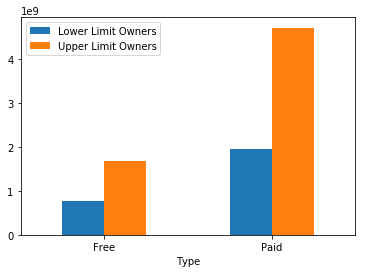

In [55]:
ax = dfFree.plot.bar(x = 'Type',rot=0) # number of free and paid games owned by people

In [68]:
data['price'] = data['price'].fillna(0)
data['price'] = data['price'].astype(int)

In [79]:
paid10 = data[(data.price < 1001) & (data.price > 0)] #games between 0.01-10 dollars
paid20 = data[(data.price > 1000) & (data.price < 2001)]
paid30 = data[(data.price > 2000) & (data.price < 3001)]
paid40 = data[(data.price > 3000) & (data.price < 4001)]
paid50 = data[(data.price > 4000) & (data.price < 5001)]
paid60 = data[(data.price > 5000) & (data.price < 6001)]
paidOver60 = data[data.price > 6000]

In [81]:
priceOfGame = [free, paid10, paid20, paid30, paid40, paid50, paid60, paidOver60] #getting all pay intervals owners
lowerOwners = []
upperOwners = []
for i in priceOfGame:
    lowerOwners.append(i['llOwners'].sum())
    upperOwners.append(i['ulOwners'].sum())

In [83]:
dfPaid = pd.DataFrame({'Type':['Free', 'Paid10', 'Paid20', 'Paid30', 'Paid40', 'Paid50', 'Paid60', 'PaidOver60'], 
                       'Lower Limit Owners':lowerOwners, 'Upper Limit Owners':upperOwners})

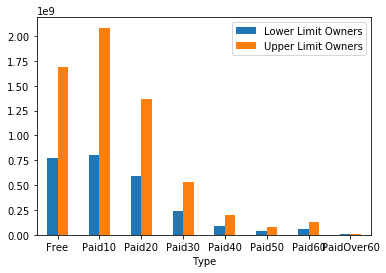

In [85]:
ax = dfPaid.plot.bar(x = 'Type',rot=0) # number of free and paid games owned by people